In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("ticks")

In [2]:
raw_data=pd.read_csv('train.csv')

In [3]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
raw_data=raw_data.drop('Name',axis=1)
raw_data=raw_data.drop('Ticket',axis=1)
raw_data=raw_data.drop('PassengerId',axis=1)
#raw_data.isnull().sum()

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
isnull=raw_data.isnull().sum()
isnull


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

So, there is missing data in Cabin and Age.


In [7]:
# percentage of missing data
isnull/len(raw_data)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
data=raw_data.drop('Cabin',axis=1)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
data1=data.dropna(subset=['Embarked'])
data1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [10]:
import math
female_mean, male_mean = data1.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

data1["Age"] = data1.apply(lambda row : fill_age(
    row["Age"],row["Sex"]),axis = 1)

data3=data1
data3.isnull().sum()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8856/1922422273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Age"] = data1.apply(lambda row : fill_age(


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
#data2=pd.concat([female_age,male_age],sort=False)
#data3=data2.sample(frac = 1)


In [12]:
data3.describe(include='all')
data3.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

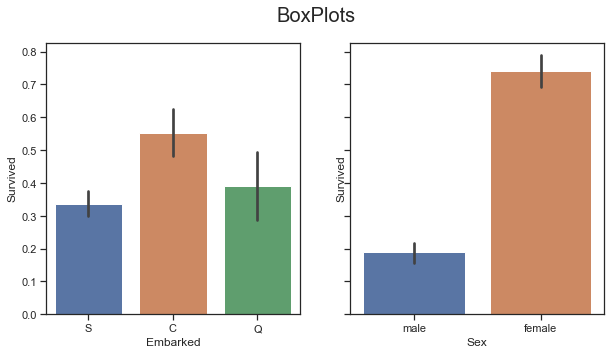

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('BoxPlots',size=20)
sns.barplot(ax=axes[1],x=data3['Sex'],y=data3['Survived'])

sns.barplot(ax=axes[0],x=data3['Embarked'],y=data3['Survived'])

## Exploring the PDFs

C:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

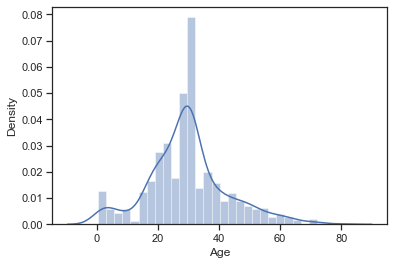

In [14]:
sns.distplot(data3['Age'])

C:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

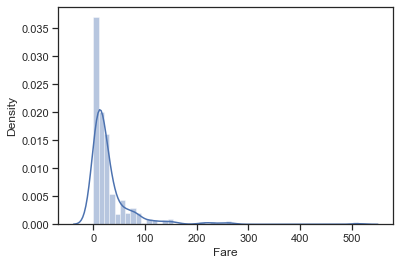

In [15]:
sns.distplot(data3['Fare'])

In [16]:
q=data3['Fare'].quantile(0.98)
data4=data3[data3['Fare']<q]

C:\Users\LENOVO\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

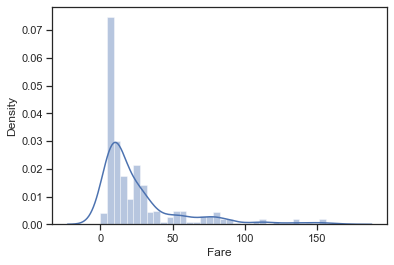

In [17]:
sns.distplot(data4['Fare'])

# Checking OLS asumption

In [18]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  869 non-null    int64  
 1   Pclass    869 non-null    int64  
 2   Sex       869 non-null    object 
 3   Age       869 non-null    float64
 4   SibSp     869 non-null    int64  
 5   Parch     869 non-null    int64  
 6   Fare      869 non-null    float64
 7   Embarked  869 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.1+ KB


## Multicolinearity

In [19]:
data4.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data4[['Age','Pclass','SibSp','Parch','Fare']]
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.727783,Age
1,3.921046,Pclass
2,1.650365,SibSp
3,1.547892,Parch
4,2.288892,Fare


# Create Dummy variable

In [21]:
data5=pd.get_dummies(data4)
data5

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,27.745174,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [22]:
x_cols=[ 'Pclass', 'Age', 'SibSp',
      'Parch', 'Fare','Sex_female', 'Sex_male',
      'Embarked_C', 'Embarked_Q', 'Embarked_S']
y_cols=['Survived']
train_inputs=data5[x_cols]
train_targets=data5[y_cols]
train_inputs

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,27.745174,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


# Scale the data

In [23]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
scaler.fit(train_inputs)
train_inputs_scaled=scaler.transform(train_inputs)
type(train_inputs_scaled)


numpy.ndarray

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(
    train_inputs_scaled,train_targets,test_size=0.2,random_state=365)

# Create Regression

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predict=model.predict(x_val)
predict.shape
print(y_val.shape)


score=model.score(x_val,y_val)
print(score)

# Confusion Matrix

from sklearn import metrics
cm=metrics.confusion_matrix(y_val,predict)
print(cm)

(174, 1)
0.8275862068965517
[[90 13]
 [17 54]]


C:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Test data

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("ticks")

test_data_inputs=pd.read_csv('test.csv')
test_data_targets=pd.read_csv('gender_submission.csv')
test_data=pd.merge(test_data_inputs,test_data_targets)

raw_data=test_data

raw_data=raw_data.drop('Name',axis=1)
raw_data=raw_data.drop('Ticket',axis=1)
raw_data=raw_data.drop('PassengerId',axis=1)
#raw_data.isnull().sum()

#raw_data.info()

isnull=raw_data.isnull().sum()
isnull



data=raw_data.drop('Cabin',axis=1)
data1=data

import math
female_mean, male_mean = data1.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

data1["Age"] = data1.apply(lambda row : fill_age(
    row["Age"],row["Sex"]),axis = 1)

# Misiing value in Fare
Fare_mean=data1.Fare.mean()
data1["Fare"].fillna( 
    method ='ffill', inplace = True)
data1
# Create Dummy variable
data4=data1
data5=pd.get_dummies(data4)
data5.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Survived      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [63]:







x_cols=[ 'Pclass', 'Age', 'SibSp',
      'Parch', 'Fare','Sex_female', 'Sex_male',
      'Embarked_C', 'Embarked_Q', 'Embarked_S']
y_cols=['Survived']
test_inputs=data5[x_cols]
test_targets=data5[y_cols]


# Scale the data

from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
scaler.fit(test_inputs)
test_inputs_scaled=scaler.transform(test_inputs)
type(test_inputs_scaled)

test_inputs.isnull().sum()
#len(test_inputs)

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [64]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test=train_test_split(
#    inputs_scaled,targets,test_size=0.0,random_state=365)

# Create Regression

#x_train, y_train, x_test, y_test=train_inputs_scaled,train_targets, test_inputs_scaled,test_targets
x_test,y_test=test_inputs_scaled,test_targets
#from sklearn.linear_model import LogisticRegression
#model=LogisticRegression()
#model.fit(x_train,y_train)
predict=model.predict(test_inputs_scaled)
predict.shape

gender_submission=pd.DataFrame()
gender_submission['PassengerId']=test_data_inputs.PassengerId
gender_submission['Survived']=predict

In [68]:
gender_submission.to_csv('gender_submission.csv',index=False)